In [1]:
%matplotlib inline 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
import statsmodels.api as sm

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()

print boston.keys()
print boston.data.shape
print boston.feature_names

['data', 'feature_names', 'DESCR', 'target']
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.  

In [12]:
#Convert ndarray to dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names

#Appending Y(PRICE) to this df
boston_df['PRICE'] = boston.target
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


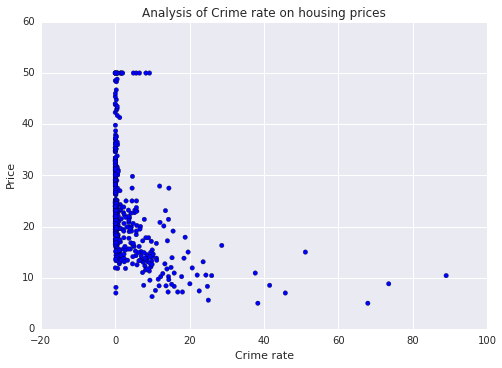

In [13]:
#Analysing relationship between various predictos and outcome
plt.scatter(boston_df.CRIM,boston_df.PRICE)
plt.xlabel('Crime rate')
plt.ylabel('Price')
plt.title('Analysis of Crime rate on housing prices')
plt.show()

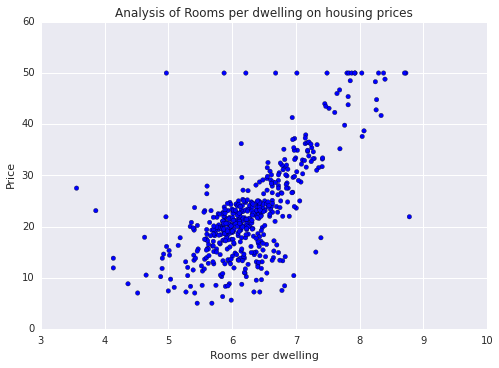

In [15]:
plt.scatter(boston_df.RM,boston_df.PRICE)
plt.xlabel('Rooms per dwelling')
plt.ylabel('Price')
plt.title('Analysis of Rooms per dwelling on housing prices')
plt.show()

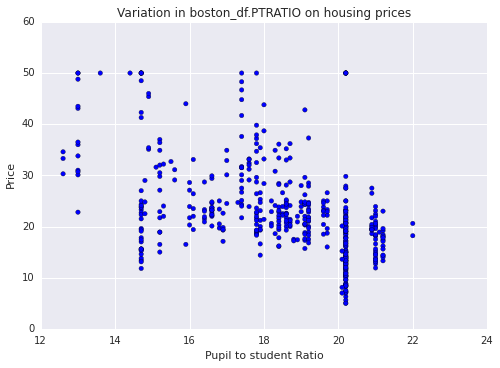

In [16]:
plt.scatter(boston_df.PTRATIO,boston_df.PRICE)
plt.xlabel('Pupil to student Ratio')
plt.ylabel('Price')
plt.title('Variation in boston_df.PTRATIO on housing prices')
plt.show()

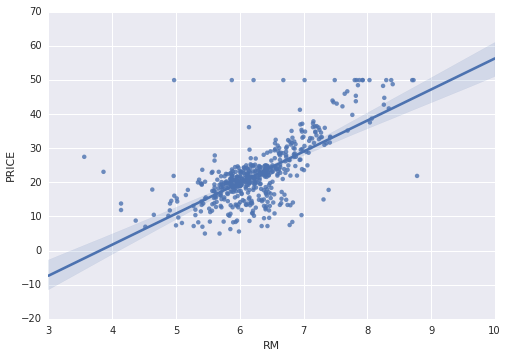

In [17]:
sns.regplot(y="PRICE",x="RM",fit_reg=True,data=boston_df) #Fitting regression line through the model

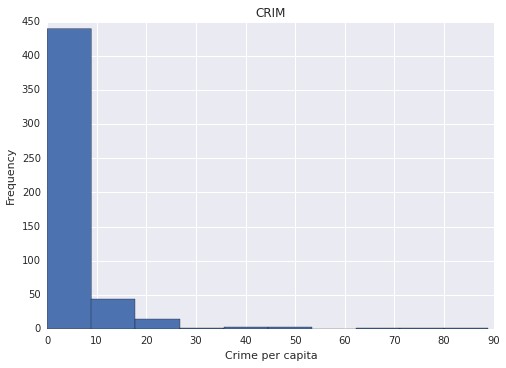

In [18]:
plt.hist(boston_df.CRIM)
plt.xlabel("Crime per capita")
plt.ylabel("Frequency")
plt.title("CRIM")
plt.show()

In [21]:
#Fitting regression using statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
model_sm = ols('PRICE ~ RM',data=boston_df).fit()
print model_sm.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 09 Oct 2015   Prob (F-statistic):           2.49e-74
Time:                        23:21:36   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

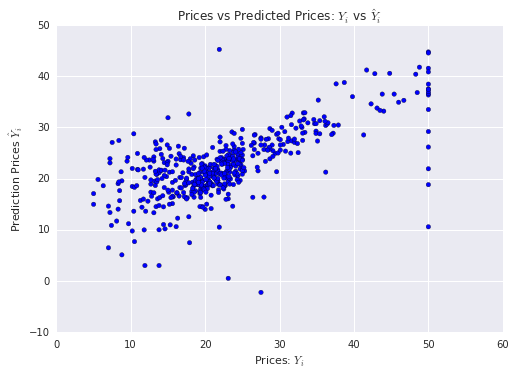

In [24]:
#Checking how well model fit our data
plt.scatter(boston_df.PRICE,model_sm.fittedvalues)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Prediction Prices $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$')
plt.show()

In [25]:
#Fitting linear regression through sklearn
from sklearn.linear_model import LinearRegression
X = boston_df.drop('PRICE',axis=1)
clf = LinearRegression()
clf.fit(X,boston_df.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print 'Estimated intercept coefficient:', clf.intercept_
print 'Number of coefficients:', len(clf.coef_)

 Estimated intercept coefficient: 36.4911032804
Number of coefficients: 13


In [30]:
coeffs = pd.DataFrame(zip(X.columns,clf.coef_),columns = ['features', 'estimatedCoefficients'])
print coeffs

   features  estimatedCoefficients
0      CRIM              -0.107171
1        ZN               0.046395
2     INDUS               0.020860
3      CHAS               2.688561
4       NOX             -17.795759
5        RM               3.804752
6       AGE               0.000751
7       DIS              -1.475759
8       RAD               0.305655
9       TAX              -0.012329
10  PTRATIO              -0.953464
11        B               0.009393
12    LSTAT              -0.525467


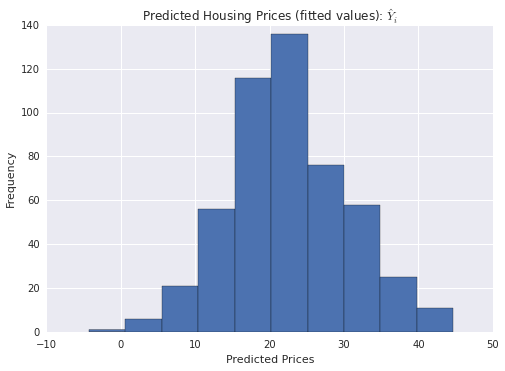

In [32]:
predicted_prices = clf.predict(X)
plt.hist(predicted_prices)
plt.xlabel('Predicted Prices')
plt.ylabel('Frequency')
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.show()

In [33]:
#Mean squred error
np.mean((predicted_prices - boston_df.PRICE)**2)

21.897779217687493

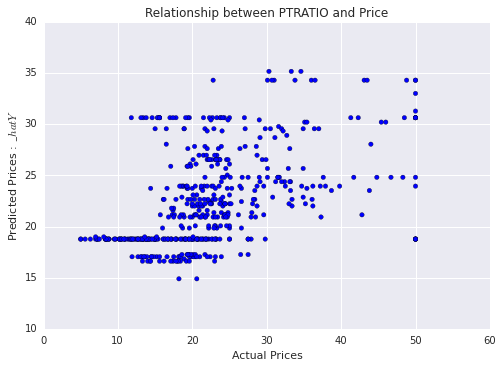

In [34]:
#Now fitting using PTRATIO only
clf_pt = LinearRegression()
clf_pt.fit(X[['PTRATIO']],boston_df.PRICE)
predicted_price_pt = clf_pt.predict(X[['PTRATIO']])

plt.scatter(boston_df.PRICE,predicted_price_pt)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices : $\_hat{Y}$')
plt.title('Relationship between PTRATIO and Price')
plt.show()

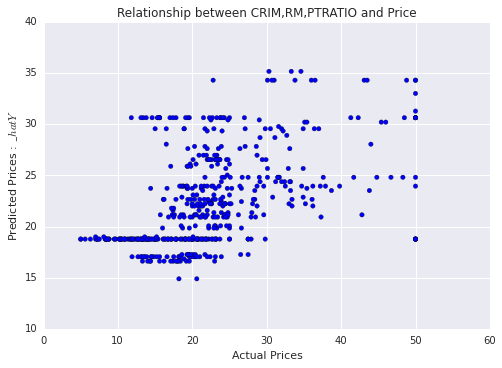

In [35]:
#Now making model using CRIM,RM,PTRATIO
feature_list = ['CRIM','RM','PTRATIO']
clf_fl = LinearRegression()
clf_fl.fit(X[feature_list],boston_df)
predicted_prices = clf_fl.predict(X[feature_list])

plt.scatter(boston_df.PRICE,predicted_price_pt)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices : $\_hat{Y}$')
plt.title('Relationship between CRIM,RM,PTRATIO and Price')
plt.show()

In [39]:
#Training and Test Data
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,boston_df.PRICE,test_size = 0.33)

clf = LinearRegression()
clf.fit(X_train,Y_train)
prediction_train = clf.predict(X_train)
prediction_test = clf.predict(X_test)

error_train = np.mean((prediction_train-Y_train)**2)
error_test = np.mean((prediction_test-Y_test)**2)

print error_train
print error_test

19.7700179779
28.8142399948


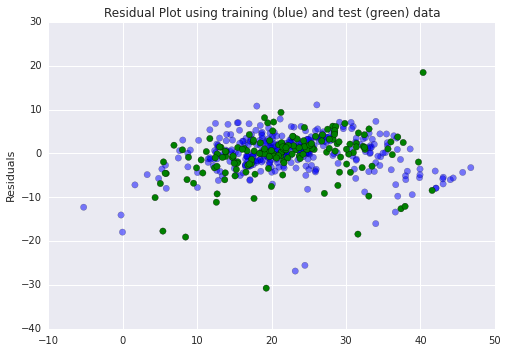

In [40]:
#Drawing residual plot
plt.scatter(prediction_train,prediction_train-Y_train,c='b', s=40, alpha=0.5)
plt.scatter(prediction_test,prediction_test-Y_test,c='g',s=40)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()

In [44]:
#Now using Old Faithful geyser dataset
faithful = sm.datasets.get_rdataset("faithful")

In [45]:
faithful = faithful.data
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


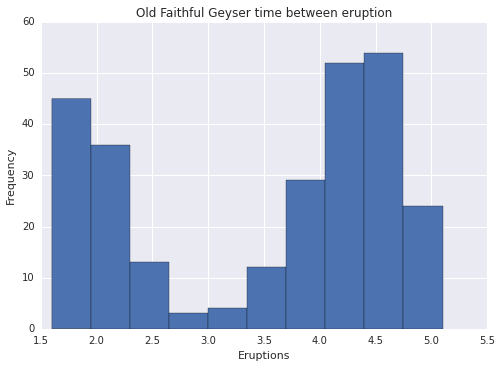

In [46]:
#Visualizing data with the help of histogram and scatter-plot
plt.hist(faithful.eruptions)
plt.xlabel('Eruptions')
plt.ylabel('Frequency')
plt.title('Old Faithful Geyser time between eruption')
plt.show()

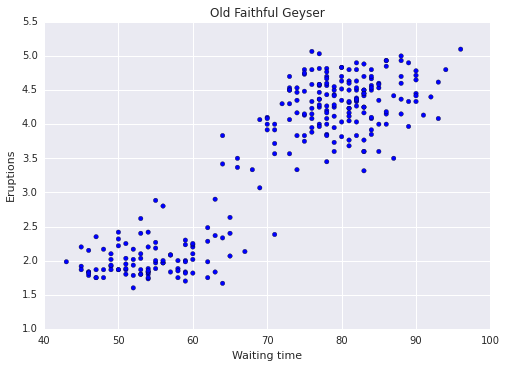

In [47]:
plt.scatter(faithful.waiting,faithful.eruptions)
plt.xlabel('Waiting time')
plt.ylabel('Eruptions')
plt.title('Old Faithful Geyser')
plt.show()

In [49]:
model_sm = sm.OLS(faithful.eruptions,faithful.waiting).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              eruptions   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     9621.
Date:                Sat, 10 Oct 2015   Prob (F-statistic):          9.97e-214
Time:                        00:00:15   Log-Likelihood:                -250.30
No. Observations:                 272   AIC:                             502.6
Df Residuals:                     271   BIC:                             506.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
waiting        0.0501      0.001     98.086      0.000         0.049     0.051
==============================================================================
Omnibus:                       37.012   Durbin-Watson:                   2.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.965
Skew:                          -0.159   Prob(JB):                      0.00416
Kurtosis:                       2.069   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#We notice intercept term is missing
X = sm.add_constant(faithful.waiting)
model_with_intercept = sm.OLS(faithful.eruptions,X).fit()
print model_with_intercept.summary()

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sat, 10 Oct 2015   Prob (F-statistic):          8.13e-100
Time:                        00:02:17   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.8740      0.160    -11.702      0.0

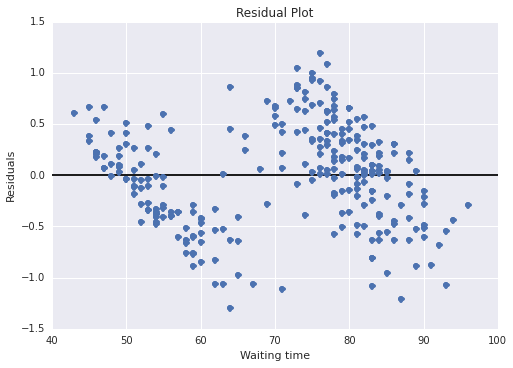

In [53]:
residuals = faithful.eruptions - model_with_intercept.predict(X)
plt.plot(faithful.waiting, residuals, 'o')
plt.hlines(y = 0, xmin=40, xmax = 100)
plt.xlabel('Waiting time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [56]:
#Now computing Matrix multiplication method for predicting eruption-time
X = sm.add_constant(X)
Y = faithful.eruptions

coeffs = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(Y)
print coeffs

[-1.87401599  0.07562795]


In [58]:
#Logisitc Regression
data=np.array([[float(j) for j in e.strip().split()] for e in open("./data/chall.txt")])

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import logit,glm,ols
df = pd.DataFrame(data,columns=['Temperature','Failure'])
model_logit = logit('Failure ~ Temperature',df).fit()
print model_logit.summary()

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Oct 2015   Pseudo R-squ.:                  0.2813
Time:                        00:14:21   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
                                        LLR p-value:                  0.004804
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      15.0429      7.379      2.039      0.041         0.581    29.505
Temperature    -0.2322    